### Importing Libraries ###

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

### Importing the dataset ###
 __Note__  : Can be done form .csv files and from .sql files
 
#### Converting into Pandas DataFrame Object ####

**Example Datasets :**

A.

Months | Inflation Rate
----------- |----------
345 | 16.76

B. 

_Name_ |Age | Distance Travelled
-------|--- |-------------------
Ramesh Singh |40 | 126

C.

Day |Time in Hrs | Boooking Frequency
----|------------|--------------
6| 9 | 2345


In [218]:
file = open('../datasets/csv/inflation-data.csv', 'r')
data = pd.read_csv(file)
file.close()
data = data.drop(data.columns[0], axis = 1)
data

,Months,Inflation Rate
0,1.0,-0.143133
1,2.0,-0.475746
2,3.0,0.383202
3,4.0,-0.226587
4,5.0,-0.208016
...,...,...
235,236.0,16.963591
236,237.0,17.476709
237,238.0,18.012098
238,239.0,18.013173


### Calculating the slope and constant forming the equation ###

In [219]:
months = data['Months'].values
inflation = data['Inflation Rate'].values

meanMonths = np.mean(X1)
meanInflation = np.mean(Y)

n = 0
d = 0

for i in range(0, len(months)):
    n += (months[i] - meanMonths) * (inflation[i] - meanInflation)
    d += (months[i] - meanMonths) ** 2

slope = n/d
constant = meanInflation - (slope*meanMonths)
slope, constant

(0.0770193652329726, -3.626604378286074)

In [220]:
monthsMax = np.max(months)
monthsMin = np.min(months) 
x = np.linspace(monthsMin, monthsMax)
y = slope * x + constant

### Scatter plotting the data ###

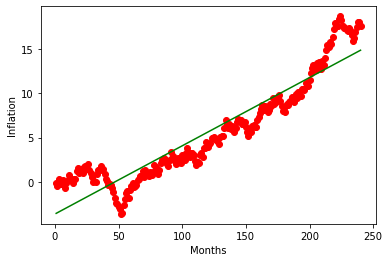

In [221]:
plt.plot(x, y , color = 'green', label = 'regression line')
plt.scatter(X1, Y, c = 'red', label= 'scatter data')
plt.xlabel('Months')
plt.ylabel('Inflation')
plt.legend
plt.show()

### Sample Prediction ###

**Input :**  Upcomming Months in Business

**Output :** Prediction set of the inflation being hiked or minimised

In [222]:
sampleMonthSet = np.array([
    250,
    260,
    270,
    280,
    600
])

predictInflationSet = np.array([])

for i in range(0, len(sampleMonthSet)):
    predictInflationSet = np.append(predictInflationSet, slope * sampleMonthSet[i] + constant)
                                    
predictInflationSet

array([15.62823693, 16.39843058, 17.16862423, 17.93881789, 42.58501476])

### Mean R square method ###

In [223]:
totalSumSq = 0
totalSumSqResidual = 0

for i in range(0, len(months)):
    yPred = slope * months[i] + constant
    totalSumSq += (inflation[i] - meanInflation) ** 2
    totalSumSqResidual += (inflation[i] - yPred) ** 2

R = 1 - (totalSumSqResidual/totalSumSq)
R

0.8705174282531776